In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Q1
def p(x, w, mu, sigma):
    return w[0]*np.exp(-(x-mu[0])**2/(2*sigma[0]**2))/(np.sqrt(2*np.pi)*sigma[0]) \
           + w[1]*np.exp(-(x-mu[1])**2/(2*sigma[1]**2))/(np.sqrt(2*np.pi)*sigma[1])

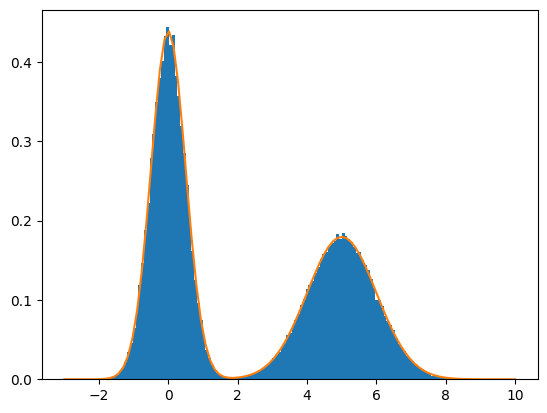

In [3]:
n = 1000000
w = np.array([0.55, 0.45])
mu = np.array([0, 5])
sigma = np.array([0.5, 1])
sample_arr = [0.6]
sigma_q = 4
for i in range(n):
    last_sample = sample_arr[-1]
    sample = np.random.normal(loc=last_sample, scale=sigma_q)
    u1 = np.random.uniform()
    log_r = np.log(p(sample, w, mu, sigma)) - np.log(p(last_sample, w, mu, sigma))
    if np.log(u1) < log_r:
        sample_arr.append(sample)
    else:
        sample_arr.append(last_sample)

plt.hist(sample_arr, bins=150, density=True)
plt.plot(np.linspace(-3, 10, 100), p(np.linspace(-3, 10, 100), w, mu, sigma))

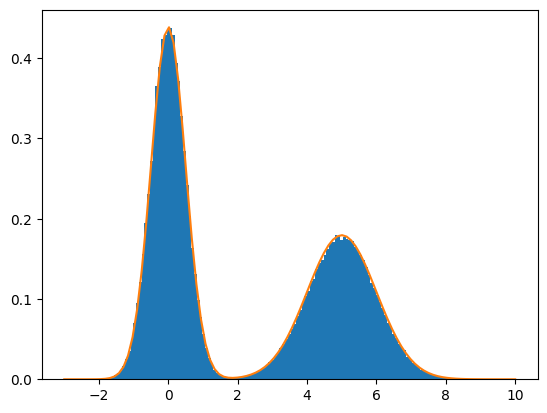

In [4]:
sample_arr = [0.6]
sigma_q = 1
for i in range(n):
    last_sample = sample_arr[-1]
    sample = np.random.normal(loc=last_sample, scale=sigma_q)
    u1 = np.random.uniform()
    log_r = np.log(p(sample, w, mu, sigma)) - np.log(p(last_sample, w, mu, sigma))
    if np.log(u1) < log_r:
        sample_arr.append(sample)
    else:
        sample_arr.append(last_sample)

plt.hist(sample_arr, bins=150, density=True)
plt.plot(np.linspace(-3, 10, 100), p(np.linspace(-3, 10, 100), w, mu, sigma))

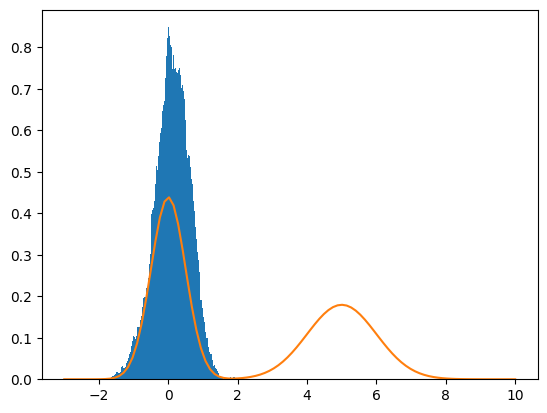

In [5]:
sample_arr = [0.6]
sigma_q = 0.01
for i in range(n):
    last_sample = sample_arr[-1]
    sample = np.random.normal(loc=last_sample, scale=sigma_q)
    u1 = np.random.uniform()
    log_r = np.log(p(sample, w, mu, sigma)) - np.log(p(last_sample, w, mu, sigma))
    if np.log(u1) < log_r:
        sample_arr.append(sample)
    else:
        sample_arr.append(last_sample)

plt.hist(sample_arr, bins=150, density=True)
plt.plot(np.linspace(-3, 10, 100), p(np.linspace(-3, 10, 100), w, mu, sigma))

In [48]:
# Q2
def log_p2(x, y):
    return -x**2/10 - y**4/10 - 2*(y-x**2)**2

def grad_log_p2(x, y):
    return np.array([-x/5+8*x*(y-x**2), -(2/5)*y**3-4*(y-x**2)])

def log_q(x_prime, y_prime, x, y, grad, gamma):
    return -((x_prime-x-gamma*grad[0])**2+(y_prime-y-gamma*grad[0])**2)*gamma

In [55]:
gamma = 1
x_arr_rw = [0.5]
y_arr_rw = [0.5]
for i in range(n):
    last_x = x_arr_rw[-1]
    last_y = y_arr_rw[-1]
    x = np.random.normal(loc=last_x, scale=2*gamma)
    y = np.random.normal(loc=last_y, scale=2*gamma)
    u1 = np.random.uniform()
    log_r = log_p2(x, y) - log_p2(last_x, last_y)
    if np.log(u1) < log_r:
        x_arr_rw.append(x)
        y_arr_rw.append(y)
    else:
        x_arr_rw.append(x)
        y_arr_rw.append(y)

KeyboardInterrupt: 

In [ ]:
gamma = 1
x_arr_mala = np.array([0.5])
y_arr_mala = np.array([0.5])
for i in range(500000):
    last_x = x_arr_mala[-1]
    last_y = y_arr_mala[-1]
    x = np.random.normal(loc=last_x+gamma*grad_log_p2(last_x, last_y)[0], scale=2*gamma)
    y = np.random.normal(loc=last_y+gamma*grad_log_p2(last_x, last_y)[1], scale=2*gamma)
    u1 = np.random.uniform()
    log_r = log_p2(x, y) - log_p2(last_x, last_y)
    if np.log(u1) < log_r:
        x_arr_mala = np.append(x_arr_mala, x)
        y_arr_mala = np.append(y_arr_mala, y)
    else:
        x_arr_mala = np.append(x_arr_mala, last_x)
        y_arr_mala = np.append(y_arr_mala, last_y)

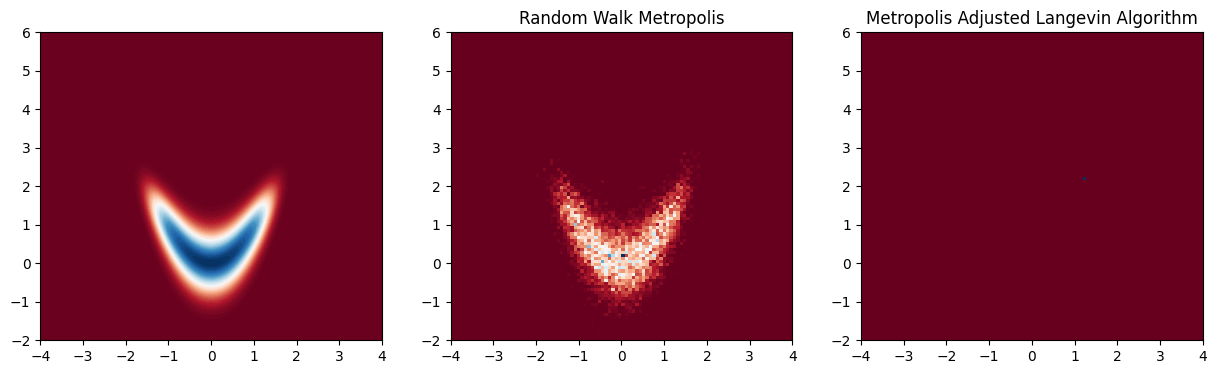

In [54]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb, Y_bb = np.meshgrid(x_bb, y_bb)
Z_bb = np.exp(log_p2(X_bb, Y_bb)) # your banana function plt.subplot(1, 3, 1)
plt.contourf(X_bb, Y_bb, Z_bb, 100, cmap='RdBu') 
plt.subplot(1, 3, 2)
plt.hist2d(x_arr_rw, y_arr_rw, 100, cmap ='RdBu', range=[[-4, 4], [-2, 6]],
density=True)
plt.title('Random Walk Metropolis')
plt.subplot(1, 3, 3)
plt.hist2d(x_arr ,y_arr, 100, cmap='RdBu', range=[[-4, 4] , [-2, 6]], density=True)
plt.title('Metropolis Adjusted Langevin Algorithm') 
plt.show()
